## import data

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv("./data/train.csv", sep="###__###",header = None, encoding='utf-8')
test = pd.read_csv("./data/test.csv", sep="###__###",header = None, encoding='utf-8')


In [3]:
train.shape

(100000, 5)

In [4]:
test.shape

(100000, 2)

## look at the data

In [5]:
train.columns = ['ID', 'Age', 'Gender', 'Education', 'Query_List']
train.head()

,ID,Age,Gender,Education,Query_List
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只..."
2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...
3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...
4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...


In [6]:
## Query_List 截断成为不同的Query
train['Query_List_Break'] = train['Query_List'].apply(lambda query: query.split('\t'))


In [7]:
## 计算Query_List的个数，并查看统计学信息
train['Query_Num'] = train['Query_List_Break'].apply(lambda query_list: len(query_list))
train['Query_Num'].describe()

count    100000.000000
mean        142.730950
std          66.919031
min          49.000000
25%         101.000000
50%         121.000000
75%         162.000000
max         498.000000
Name: Query_Num, dtype: float64

In [8]:
## 计算Query长度的平均值，并查看统计学信息
train['Query_Length_Mean'] = train['Query_List_Break'].apply(lambda query_list: np.mean([len(query) for query in query_list]))
train['Query_Length_Mean'].describe()


count    100000.000000
mean          7.678838
std           1.347665
min           1.101010
25%           6.846916
50%           7.604697
75%           8.407122
max          45.340206
Name: Query_Length_Mean, dtype: float64

In [9]:
train.head()

,ID,Age,Gender,Education,Query_List,Query_List_Break,Query_Num,Query_Length_Mean
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...,"[柔和双沟, 女生, 中财网首页 财经, http://pan.baidu.com/s/1p...",275,8.654545
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只...","[广州厨宝烤箱, 世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕, 厦门酒店用品批发市场, 我...",186,8.838710
2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...,"[钻石之泪耳机, 盘锦到沈阳, 旅顺公交, 辽宁阜新车牌, baidu, k715, k71...",104,5.740385
3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...,"[最受欢迎狗狗排行榜, 舶怎么读, 场景描 写范例, 三维绘图软件, 枣和酸奶能一起吃吗, ...",173,6.502890
4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...,"[干槽症能自愈吗, 太太万岁叶舒心去没去美国, 干槽症, 右眼皮下面一直跳是怎么回事, 麦当...",117,8.649573


In [121]:
import seaborn as sns

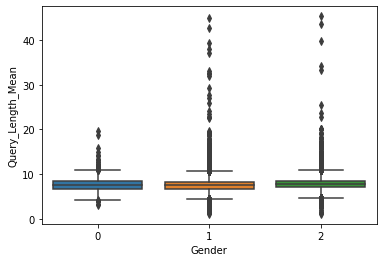

In [68]:
sns.boxplot(data=train, x='Gender', y='Query_Length_Mean')

In [70]:
train.groupby(by='Gender').agg({'Query_Length_Mean':['median', 'mean']})

Query_Length_Mean          
                  median      mean
Gender                            
0               7.514085  7.571780
1               7.492958  7.565798
2               7.753731  7.842073

In [71]:
train.groupby(by='Education').agg({'Query_Length_Mean':['median', 'mean']})

Query_Length_Mean          
                     median      mean
Education                            
0                  7.600000  7.683870
1                  7.596593  7.774743
2                  7.573593  7.608511
3                  7.571974  7.630741
4                  7.689655  7.772251
5                  7.575163  7.643540
6                  7.512000  7.599113

In [72]:
train.groupby(by='Age').agg({'Query_Length_Mean':['median', 'mean']})

Query_Length_Mean          
               median      mean
Age                            
0            7.506957  7.592866
1            7.555556  7.620877
2            7.650943  7.741557
3            7.623457  7.679814
4            7.641407  7.715621
5            7.650883  7.756314
6            7.722222  7.862378

In [73]:
train.groupby(by='Age').agg({'Query_Num':['median', 'mean']})

Query_Num            
       median        mean
Age                      
0         122  145.129052
1         120  141.184583
2         124  146.756768
3         122  142.843704
4         120  139.096677
5         120  138.508556
6         116  137.840491

## jieba

In [15]:
import jieba

In [16]:
sen = train['Query_List'][100]
jieba.lcut(sen)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Liyifan\AppData\Local\Temp\jieba.cache
Loading model cost 0.656 seconds.
Prefix dict has been built successfully.


['小生',
 '梦',
 '惊魂',
 '\t',
 '鼠标',
 '怎么',
 '拆开',
 '图解',
 '\t',
 '我们',
 '的',
 '十年',
 '\t',
 '求导',
 '法则',
 '\t',
 '终极',
 '一班',
 '4',
 '百度',
 '云',
 '资源',
 '\t',
 '亲家',
 '过年',
 '\t',
 '电影',
 '\t',
 '小虎子',
 '闯世界',
 '\t',
 '六弄',
 '咖啡馆',
 '百度',
 '云',
 '\t',
 '一寸',
 '\t',
 '番',
 '12',
 '路',
 '公交车',
 '路线',
 '\t',
 '巴塞罗那',
 '\t',
 '微微',
 '一笑倾城',
 '电影网',
 '盘',
 '\t',
 '神厨',
 '电影',
 '资源',
 '分享',
 '\t',
 '法线',
 '方程',
 '\t',
 'pokemon',
 ' ',
 'go',
 '怎么',
 '玩',
 '不了',
 '\t',
 '广州',
 '北京路',
 '步行街',
 '\t',
 '终极',
 '一班',
 '4',
 '云盘',
 '资源',
 '\t',
 '窃资达',
 '人',
 '\t',
 '活色生香',
 '小说',
 '\t',
 '钢铁',
 '侠',
 '2',
 '\t',
 '钢铁',
 '侠',
 '3',
 '\t',
 'cosx',
 '周期',
 '\t',
 '封神',
 '传奇',
 '搜索',
 '百科',
 '\t',
 '钢铁',
 '侠',
 '4',
 '\t',
 '餐',
 '吧',
 '\t',
 '卡塔尔',
 '基地',
 '\t',
 '霸道',
 '总裁',
 '活色生香',
 '\t',
 '微波炉',
 '烤红薯',
 '\t',
 'y',
 '=',
 'x',
 '^',
 '3',
 '\t',
 '雪儿',
 '未',
 '删减',
 '版',
 '\t',
 'limf',
 '(',
 'x',
 ')',
 '存在',
 ',',
 '则',
 'f',
 '(',
 'x',
 ')',
 '在',
 'x',
 '处',
 '\t',
 '星探',
 '电影',
 '\t',
 '安

In [23]:
from tqdm import tqdm
tqdm.pandas()

In [24]:
train['jieba_cut'] = train['Query_List'].progress_apply(jieba.lcut)

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [08:55<00:00, 186.59it/s]


In [53]:
train['jieba_cut'].values

array([list(['柔和', '双沟', '\t', '女生', '\t', '中财网', '首页', ' ', '财经', '\t', 'http', ':', '/', '/', 'pan', '.', 'baidu', '.', 'com', '/', 's', '/', '1plpjtn9', '\t', '周公', '解梦', '大全', '查询', '2345', '\t', '曹云金', '再讽', '郭德纲', '\t', '总裁', '大人', '行行好', '\t', '中财网', '第一', '财经', '传媒', '\t', '教师节', '全文', '\t', '男子', '砸毁', '15', '墓碑', '\t', '黄岩岛', '最新', '填', '海图', '\t', '引起', '的', '疲', '\t', '缘来', '未', '迟落', '跑', '甜心', '不好惹', '\t', '梁朝伟', '与', '替身', '同框', '\t', '笑傲江湖', '电视剧', '任贤齐', '\t', '小起', '名字', '女孩', '名字', '\t', '海运', '行李', '到', '堪培拉', '\t', '确定', '\t', '诱爱', '99', '天', ' ', '司少', '的', '天价', '宝贝', '\t', '什么', '是', '遥控', '魔棒', '\t', '徽信', '表情', '动态', '搞笑', '图片', '\t', '教师节', '征文', '100', '字', '\t', '安微', '联通', '网上', '营业厅', '\t', '甜宠', '百分百', ':', '校草', '的', '萌萌', '未婚妻', '\t', '豪门', '重生', '之暖爱', '成婚', '\t', 'nikehypershift', '和', 'kd5', '哪个', '好看', '\t', '韭菜', '炒鸡蛋', '\t', '陈赫', '玩', '王者', '荣耀', '\t', '虎牙', '楚河', '\t', '三国演义', '小说', 'txt', '下载', '\t', '威县', '欧派', '\t', '炒', '馍', '花', '怎么', '做'

In [37]:
train.to_csv('train_210217.csv')

## word statistics

In [54]:
word_list = [item for sublist in train['jieba_cut'].values for item in sublist]

In [55]:
len(word_list)

69026647

In [79]:
words_df = pd.DataFrame({'words':word_list})

In [80]:
words_stat = words_df.groupby('words').agg({'words': np.size})

In [81]:
words_stat.columns = ['num']

In [82]:
words_stat = words_stat.sort_values(by=["num"],ascending=False).reset_index()

In [126]:
top_10_words = words_stat[:10]['words'].values
top_10_words

array(['\t', '的', '什么', '是', '怎么', ' ', '吗', '图片', '有', '了'], dtype=object)

In [154]:
words_stat[:50]['words'].values

array(['\t', '的', '什么', '是', '怎么', ' ', '吗', '图片', '有', '了', '和', '我',
       '在', '手机', '多少', '意思', ',', '小说', '视频', '之', '好', '到', '可以',
       '2016', '下载', '大全', '吃', '你', '与', '用', '能', '人', '不', '钱', 'qq',
       '电影', '中国', '大', '怎么办', '说', '世界', '上', '哪个', '为什么', '做', '年', '小',
       '2', '重生', '如何'], dtype=object)

### space_freq

In [116]:
train['space_freq'] = train.apply(lambda row: row['jieba_cut'].count(' ') / row['Query_Num'], axis=1)

In [118]:
train.groupby(by='Education').agg({'space_freq':['median', 'mean']})

space_freq          
              median      mean
Education                     
0           0.016695  0.031705
1           0.019417  0.047129
2           0.020583  0.064066
3           0.016854  0.041668
4           0.015544  0.028870
5           0.020408  0.033972
6           0.018018  0.031503

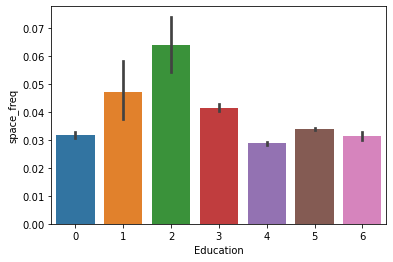

In [123]:
sns.barplot(data=train, x='Education', y='space_freq')

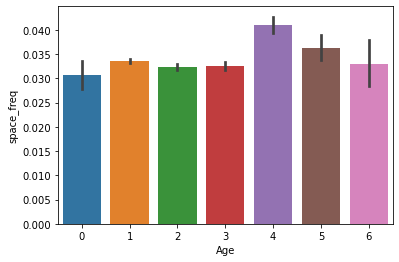

In [124]:
sns.barplot(data=train, x='Age', y='space_freq')

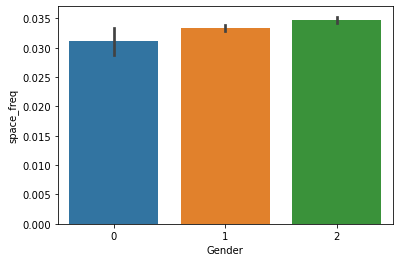

In [125]:
sns.barplot(data=train, x='Gender', y='space_freq')

### 的_freq

In [127]:
train['的_freq'] = train.apply(lambda row: row['jieba_cut'].count('的') / row['Query_Num'], axis=1)

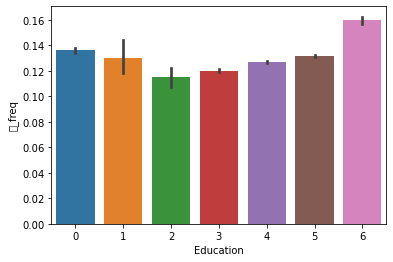

In [129]:
sns.barplot(data=train, x='Education', y='的_freq')

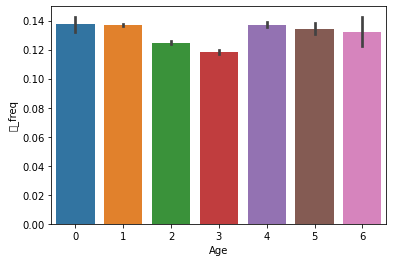

In [130]:
sns.barplot(data=train, x='Age', y='的_freq')

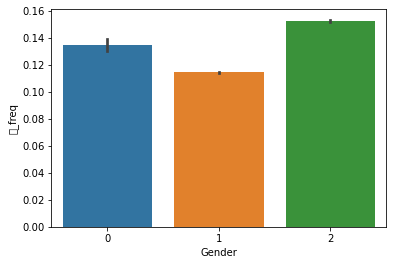

In [131]:
sns.barplot(data=train, x='Gender', y='的_freq')

### 什么_freq

In [132]:
train['什么_freq'] = train.apply(lambda row: row['jieba_cut'].count('什么') / row['Query_Num'], axis=1)

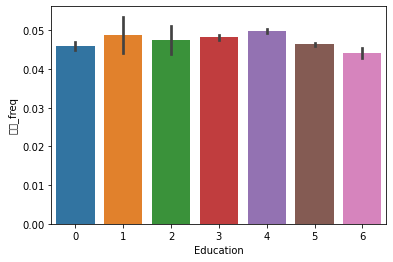

In [133]:
sns.barplot(data=train, x='Education', y='什么_freq')

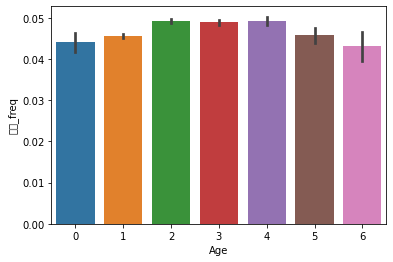

In [134]:
sns.barplot(data=train, x='Age', y='什么_freq')

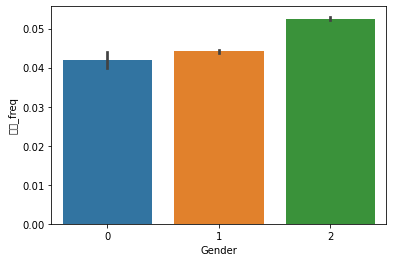

In [135]:
sns.barplot(data=train, x='Gender', y='什么_freq')

### 是_freq

In [136]:
train['是_freq'] = train.apply(lambda row: row['jieba_cut'].count('是') / row['Query_Num'], axis=1)

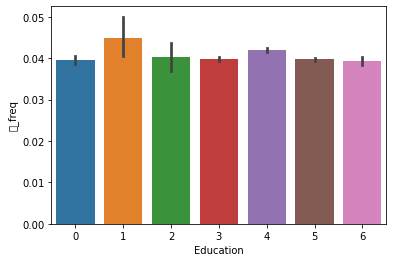

In [137]:
sns.barplot(data=train, x='Education', y='是_freq')

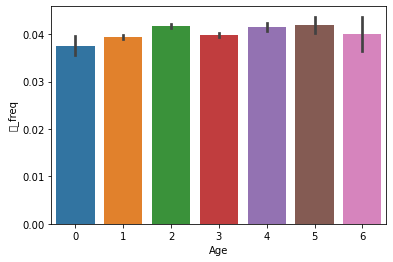

In [138]:
sns.barplot(data=train, x='Age', y='是_freq')

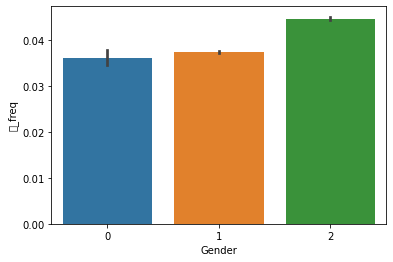

In [140]:
sns.barplot(data=train, x='Gender', y='是_freq')

### 吗_freq

In [141]:
train['吗_freq'] = train.apply(lambda row: row['jieba_cut'].count('吗') / row['Query_Num'], axis=1)

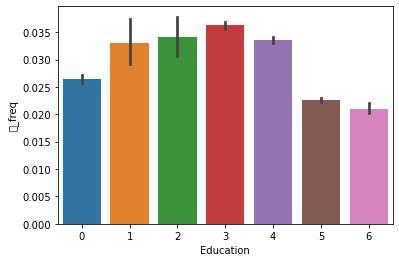

In [142]:
sns.barplot(data=train, x='Education', y='吗_freq')

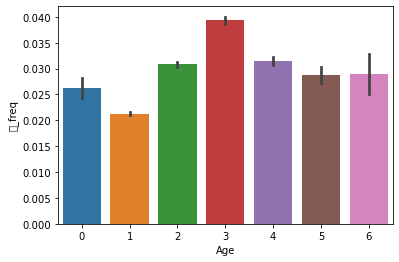

In [143]:
sns.barplot(data=train, x='Age', y='吗_freq')

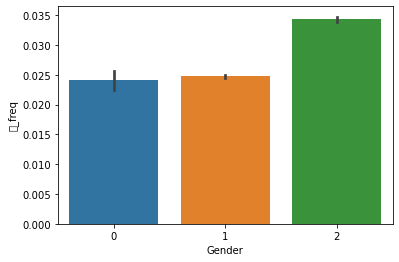

In [144]:
sns.barplot(data=train, x='Gender', y='吗_freq')

### 怎么_freq

In [145]:
train['怎么_freq'] = train.apply(lambda row: row['jieba_cut'].count('怎么') / row['Query_Num'], axis=1)

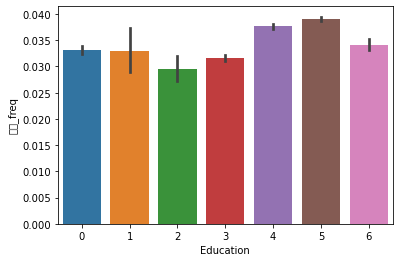

In [146]:
sns.barplot(data=train, x='Education', y='怎么_freq')

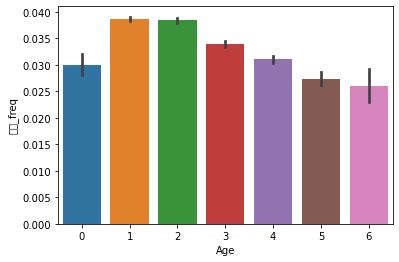

In [147]:
sns.barplot(data=train, x='Age', y='怎么_freq')

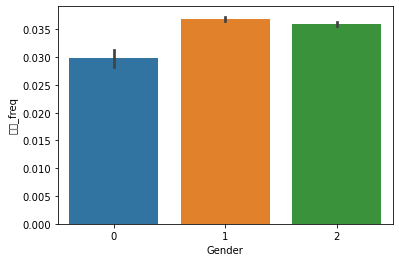

In [148]:
sns.barplot(data=train, x='Gender', y='怎么_freq')

### 了_freq

In [149]:
train['了_freq'] = train.apply(lambda row: row['jieba_cut'].count('了') / row['Query_Num'], axis=1)

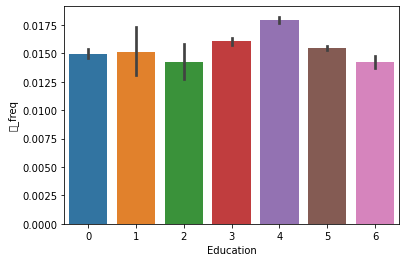

In [150]:
sns.barplot(data=train, x='Education', y='了_freq')

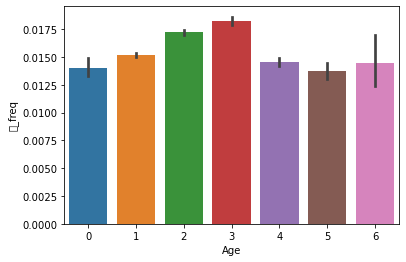

In [151]:
sns.barplot(data=train, x='Age', y='了_freq')

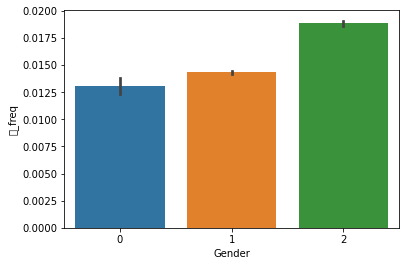

In [152]:
sns.barplot(data=train, x='Gender', y='了_freq')

In [153]:
train.head()

,ID,Age,Gender,Education,Query_List,Query_List_Break,Query_Num,Query_Length_Mean,jieba_cut,space_freq,的_freq,什么_freq,是_freq,吗_freq,怎么_freq,了_freq
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...,"[柔和双沟, 女生, 中财网首页 财经, http://pan.baidu.com/s/1p...",275,8.654545,"[柔和, 双沟, \t, 女生, \t, 中财网, 首页, , 财经, \t, http,...",0.029091,0.178182,0.029091,0.025455,0.000000,0.021818,0.000000
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只...","[广州厨宝烤箱, 世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕, 厦门酒店用品批发市场, 我...",186,8.838710,"[广州, 厨宝, 烤箱, \t, 世情, 薄, ,, 人情, 恶, ,, 雨送, 黄昏, 花...",0.064516,0.365591,0.123656,0.102151,0.000000,0.053763,0.043011
2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...,"[钻石之泪耳机, 盘锦到沈阳, 旅顺公交, 辽宁阜新车牌, baidu, k715, k71...",104,5.740385,"[钻石, 之泪, 耳机, \t, 盘锦, 到, 沈阳, \t, 旅顺, 公交, \t, 辽宁...",0.028846,0.019231,0.019231,0.009615,0.009615,0.000000,0.000000
3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...,"[最受欢迎狗狗排行榜, 舶怎么读, 场景描 写范例, 三维绘图软件, 枣和酸奶能一起吃吗, ...",173,6.502890,"[最, 受欢迎, 狗狗, 排行榜, \t, 舶, 怎么, 读, \t, 场景, 描, , ...",0.040462,0.202312,0.040462,0.034682,0.017341,0.028902,0.017341
4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...,"[干槽症能自愈吗, 太太万岁叶舒心去没去美国, 干槽症, 右眼皮下面一直跳是怎么回事, 麦当...",117,8.649573,"[干槽症, 能, 自愈, 吗, \t, 太太, 万岁, 叶, 舒心, 去, 没, 去, 美国...",0.051282,0.188034,0.094017,0.059829,0.042735,0.042735,0.017094
